# Analysis of scores

In [3]:
#pip install xlrd
import pandas as pd
from statistics import mean, stdev
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns

In [2]:
# https://docs.bokeh.org/en/latest/docs/gallery/bar_dodged.html
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import dodge

## All Models

### F1 scores across all 5 test runs used in S16
To help determine the feature or feature combination that is the best predictor of stress

In [2]:
allModels = pd.read_excel('D:WESAD/model_metrics.xlsx', 
                             index_col=0,sheet_name='all_models',
                             dtype={'Name': str, 'Value': float})
allModels

,model,f1_stress,f1_acc
0,allChest,0.9907,0.9869
1,chLessAcc,0.9694,0.9348
2,ACC,0.6319,0.7154
3,EDA,0.6195,0.7435
4,TEMP,0.4952,0.6019
5,accEdaTemp,0.9869,0.9823


     Using all sensor features when compared to splitting the sensor data was the best predictor of stress
     f1 stress and f1 average for model accEdaTemp was nearly equal to model allChest
     Features from the chest device corresponding to the wrist device included 
     the accelerometer, epidermal activity, skin temperature were included in model accEdaTemp.

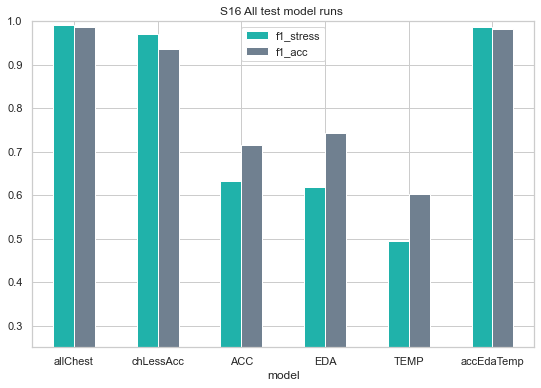

In [98]:
#plt.style.use('ggplot')
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(9,6))
allModels.plot(kind='bar', x='model', sharex=True, ax=ax, rot=0, color=['lightseagreen','slategray'])
plt.title('S16 All test model runs ')
plt.ylim(0.25, 1);

In [53]:
f1Avg = pd.read_excel('D:WESAD/model_metrics.xlsx', 
                             index_col=0,sheet_name='all_S16_f1',
                             dtype={'Name': str, 'Value': float})
round(f1Avg.T,4)

,allChest,chLessAcc,ACC,EDA,TEMP,accEdaTemp
f1_stress,0.9907,0.9694,0.6319,0.6195,0.4952,0.9869
f1_acc,0.9869,0.9348,0.7154,0.7435,0.6019,0.9823


    Clearly, using all chest features produced the best prediction result: accEdaTemp is a close second. 

##  Stress by Model: allChest vs accEdaTemp

In [45]:
stress_by_model = pd.read_excel('D:WESAD/model_metrics.xlsx', index_col=0,sheet_name='stress_by_model',
              dtype={'Name': str, 'Value': float})
round(stress_by_model,4)

,subject,allChest,accEdaTemp
0,S4,0.9891,0.9830
1,S8,0.9893,0.9768
2,S11,0.9947,0.9891
3,S13,0.9923,0.9849
4,S16,0.9912,0.9869
5,S17,0.9990,0.9978


In [97]:
print('Model allChest: Mean = ', round(mean(stress_by_model['allChest']),4))
print('Model accEdaTemp: Mean = ', round(mean(stress_by_model['accEdaTemp']),4))

Model allChest: Mean =  0.9926
Model accEdaTemp: Mean =  0.9864


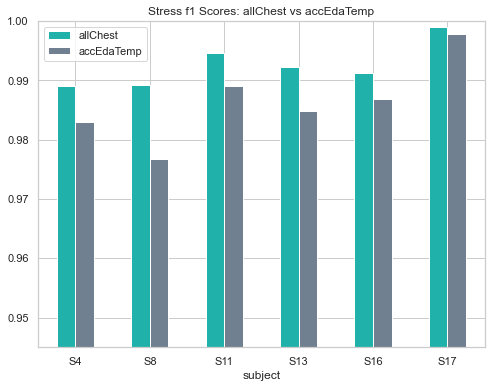

In [96]:
f, ax = plt.subplots(figsize=(8,6))
stress_by_model.plot(kind='bar', x='subject', sharex=True, ax=ax, rot=0, color=['lightseagreen','slategray'])
plt.ylim(0.945, 1)
plt.title('Stress f1 Scores: allChest vs accEdaTemp');

## Stress condition scores
    The number of subjects is too low to make any reliable analyses.
    However, the analyses are presented here as an example of what else might be accomplished using this type of data.

### Comfort during Stress
used excel pivot

     Analysis of difference between comfort levels. 
     in this case comfort level was between feeling cold and not feeling cold during the stress test

In [4]:
stress_by_comfort_level = pd.read_excel('D:WESAD/model_metrics.xlsx', index_col=0,sheet_name='comfort_level',
              dtype={'Name': str, 'Value': float})
stress_by_comfort_level

,subject,f1_stress,comfort_level
0,S4,0.9887,not_cold
1,S8,0.9893,cold
2,S11,0.9947,not_cold
3,S13,0.9940,not_cold
4,S16,0.9912,cold
5,S17,0.9990,not_cold


In [10]:
print('Felt cold during Stress conditioning: Mean = ', round(mean(stress_by_comfort_level['f1_stress'][0:2]),4))
print('Did not feel cold during Stress conditioning: Mean = ', round(mean(stress_by_comfort_level['f1_stress'][2:6]),4))

Felt cold during Stress conditioning: Mean =  0.989
Did not feel cold during Stress conditioning: Mean =  0.9947


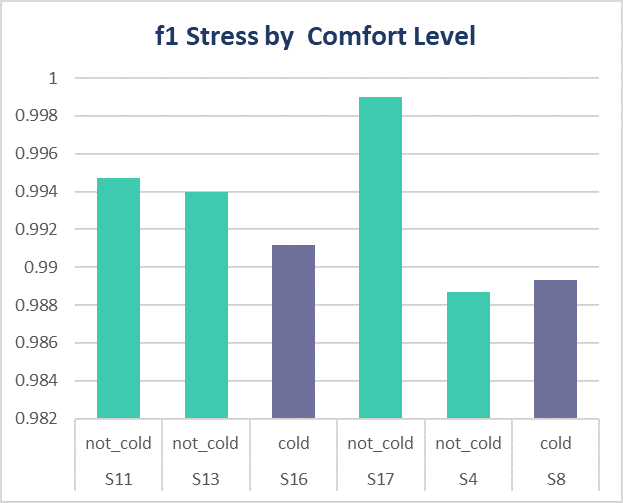

In [8]:
Image(width = 500, filename = 'D:/WESAD/stress_by_comfort.png')

    There appears to be a slight but not significant difference between comfort levels during the stress conditioning

###  Stress vs
     Analysis of difference between gender: Female = 0, Male = 1

In [90]:
stress_by_gender = pd.read_excel('D:WESAD/model_metrics.xlsx', index_col=0,sheet_name='gender',
              dtype={'Name': str, 'Value': float})
stress_by_gender

,subject,f1_stress,f1_baseline,gender,f1_acc
0,S4,0.9891,0.9975,male,0.9923
1,S13,0.9923,0.9977,male,0.9918
2,S16,0.9912,0.9953,male,0.9869
3,S8,0.9893,0.9965,female,0.9915
4,S11,0.9947,0.9961,female,0.9822
5,S17,0.9990,0.9986,female,0.9936


### Stress vs Baseline

In [58]:
print('Stress: Mean = ', round(mean(stress_by_gender['f1_stress']),4))
print('Baseline: Mean = ', round(mean(stress_by_gender['f1_baseline']),4))
print('f1 Average: Mean = ', round(mean(stress_by_gender['f1_acc']),4))

Stress: Mean =  0.9926
Baseline: Mean =  0.997
f1 Average: Mean =  0.9897


Stress and Baseline outperform the f1 average

In [61]:
subject = stress_by_gender['subject']
g = figure(x_range=subject, y_range=(0.97, 1), plot_height=350, title="Stress vs. Baseline",
           toolbar_location=None, tools="")

g.vbar(x=dodge('subject', -0.25, range=g.x_range), top='f1_stress', width=0.2, source=stress_by_gender,
       color="mediumturquoise", legend_label="f1_stress")

g.vbar(x=dodge('subject',  0.0,  range=g.x_range), top='f1_baseline', width=0.2, source=stress_by_gender,
       color="#718dbf", legend_label="f1_baseline")

g.vbar(x=dodge('subject',  0.25,  range=g.x_range), top='f1_avg', width=0.2, source=stress_by_gender,
       color="lightslategray", legend_label="f1_avg")

g.x_range.range_padding = 0.1
g.xgrid.grid_line_color = None
g.legend.location = "top_left"
g.legend.orientation = "horizontal"

show(g)

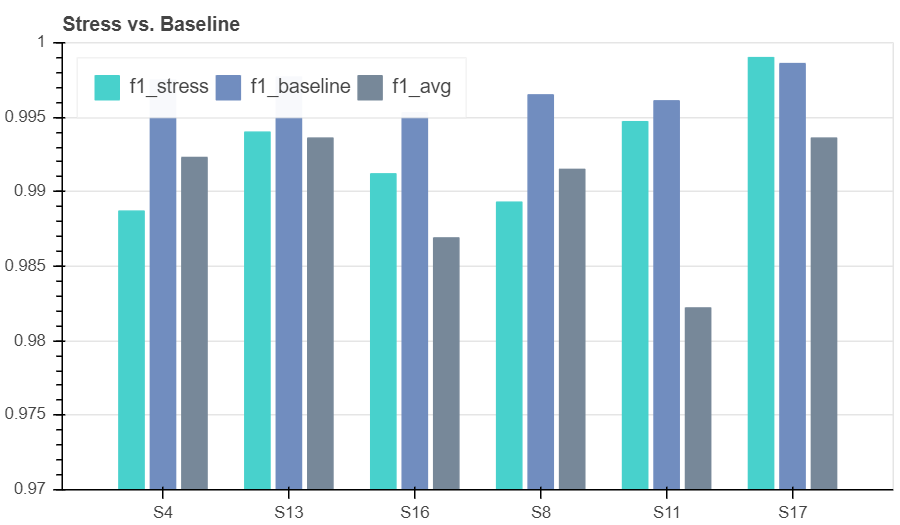

In [69]:
from IPython.display import Image
Image(width = 600, filename = 'D:/WESAD/Stress_vs_Baseline_S16.png')

###  Stress vs Baseline by Gender 
    This graph was made using an excel pivot table.
    Same information as the previous (bokeh) graph but with gender class included.

In [50]:
from statistics import mean
print('Male Stress: Mean = ', round(mean(stress_by_gender['f1_stress'][0:3]),4))
print('Female Stress: Mean = ', round(mean(stress_by_gender['f1_stress'][3:6]),4))
print('-----------------------------')
print('Male Baseline: Mean = ', round(mean(stress_by_gender['f1_baseline'][0:3]),4))
print('Femal Baseline: Mean = ', round(mean(stress_by_gender['f1_baseline'][3:6]),4))

Male Stress: Mean =  0.9909
Female Stress: Mean =  0.9943
-----------------------------
Male Baseline: Mean =  0.9968
Femal Baseline: Mean =  0.9971


    Baseline conditioning between male and female are essentially identical.
    There appears to be a slight but not significant difference between male and female during the stress conditioning

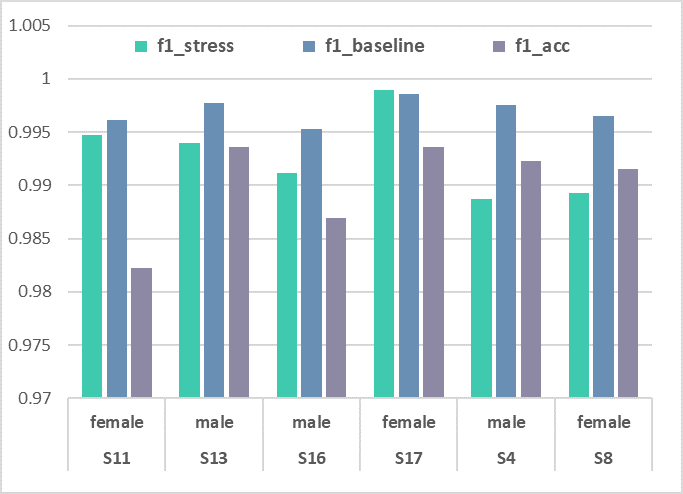

In [75]:
Image(width = 600, filename = 'D:/WESAD/Stress_by_Gender.png')